In [787]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [788]:
DF = pd.read_csv('../data/Sleep_health_and_lifestyle_dataset.csv')
DF

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [789]:
DF['Blood Pressure'].str.split('/', expand=True)

,0,1
0,126,83
1,125,80
2,125,80
3,140,90
4,140,90
...,...,...
369,140,95
370,140,95
371,140,95
372,140,95


In [790]:
DF.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [791]:
DF.fillna('None', inplace=True)

In [792]:
DF.corr(numeric_only=True)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


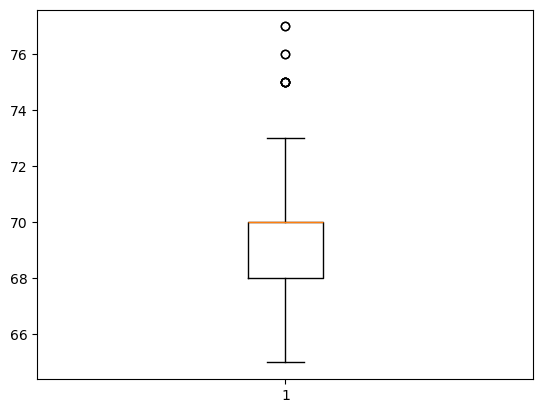

In [793]:
plt.boxplot(DF[DF['Sleep Disorder'] == 'None']['Heart Rate'])
plt.show()

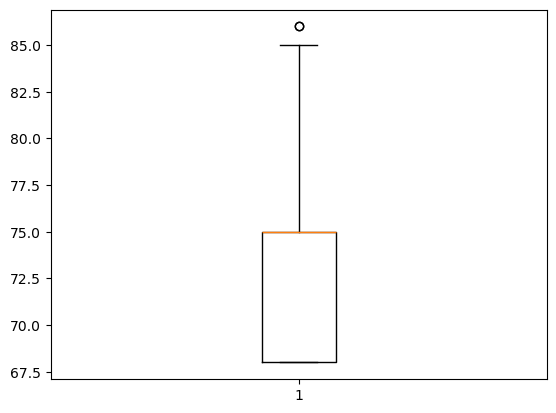

In [794]:
plt.boxplot(DF[DF['Sleep Disorder'] == 'Sleep Apnea']['Heart Rate'])
plt.show()

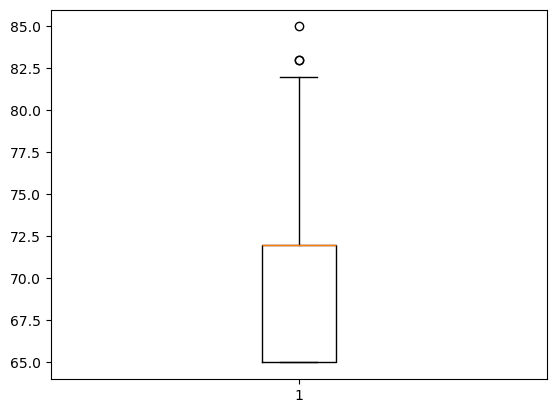

In [795]:
plt.boxplot(DF[DF['Sleep Disorder'] == 'Insomnia']['Heart Rate'])
plt.show()

In [796]:
(DF[DF['Sleep Disorder'] == 'None']['Heart Rate'].describe())

count    219.000000
mean      69.018265
std        2.657797
min       65.000000
25%       68.000000
50%       70.000000
75%       70.000000
max       77.000000
Name: Heart Rate, dtype: float64

In [797]:
(DF[DF['Sleep Disorder'] == 'Sleep Apnea']['Heart Rate'].describe())

count    78.000000
mean     73.089744
std       5.117289
min      68.000000
25%      68.000000
50%      75.000000
75%      75.000000
max      86.000000
Name: Heart Rate, dtype: float64

In [798]:
(DF[DF['Sleep Disorder'] == 'Insomnia']['Heart Rate'].describe())

count    77.000000
mean     70.467532
std       4.948643
min      65.000000
25%      65.000000
50%      72.000000
75%      72.000000
max      85.000000
Name: Heart Rate, dtype: float64

In [799]:
feature = DF[['Sleep Duration', 'Quality of Sleep']]
target = DF['Stress Level']

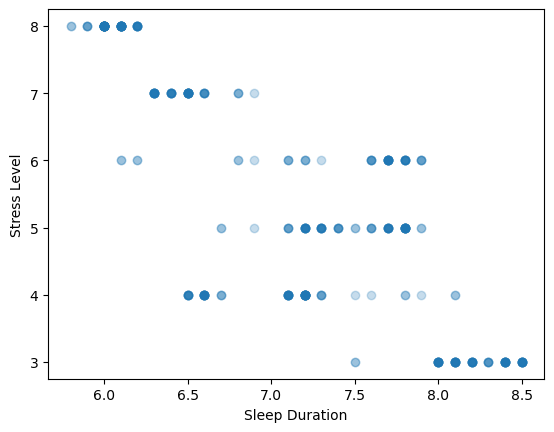

In [800]:
plt.scatter(feature['Sleep Duration'], target, alpha=0.25)
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')
plt.show()

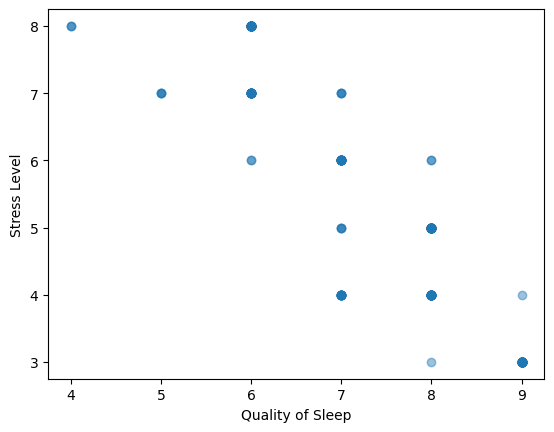

In [801]:
plt.scatter(feature['Quality of Sleep'], target, alpha=0.25)
plt.xlabel('Quality of Sleep')
plt.ylabel('Stress Level')
plt.show()

In [802]:
X_train, X_test, y_train, y_test = train_test_split(feature, target,
                                                    test_size=0.2,
                                                    random_state=42)

In [803]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [804]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8007688543073701, 0.83439234087026)

In [805]:
from sklearn.linear_model import SGDRegressor, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier

In [806]:
models = []

models.append(LinearRegression())
models.append(SGDRegressor())
models.append(KNeighborsRegressor())
models.append(SVR())
models.append(RandomForestRegressor(random_state=42))
models.append(GradientBoostingRegressor(random_state=42))

In [807]:
for m in models:
    m.fit(X_train, y_train)
    print('model : ', m)
    print('train : ', m.score(X_train, y_train))
    print('test : ', m.score(X_test, y_test))
    print()

model :  LinearRegression()
train :  0.8007688543073701
test :  0.83439234087026

model :  SGDRegressor()
train :  0.28667286434539274
test :  0.20219353343785096

model :  KNeighborsRegressor()
train :  0.903526929563314
test :  0.9098668487538409

model :  SVR()
train :  0.8844205565020644
test :  0.9056319314552381

model :  RandomForestRegressor(random_state=42)
train :  0.9198662875956518
test :  0.9308774312700292

model :  GradientBoostingRegressor(random_state=42)
train :  0.9194786496531344
test :  0.9298344962391516


In [808]:
train_score = []
test_score = []
max_score = -1
for k in range(1, 81):
    KNN_model = KNeighborsRegressor(n_neighbors=k)
    KNN_model.fit(X_train, y_train)
    train_score.append(KNN_model.score(X_train, y_train))
    test_score.append(KNN_model.score(X_test, y_test))
    if test_score[-1] > max_score:
        max_score = test_score[-1]

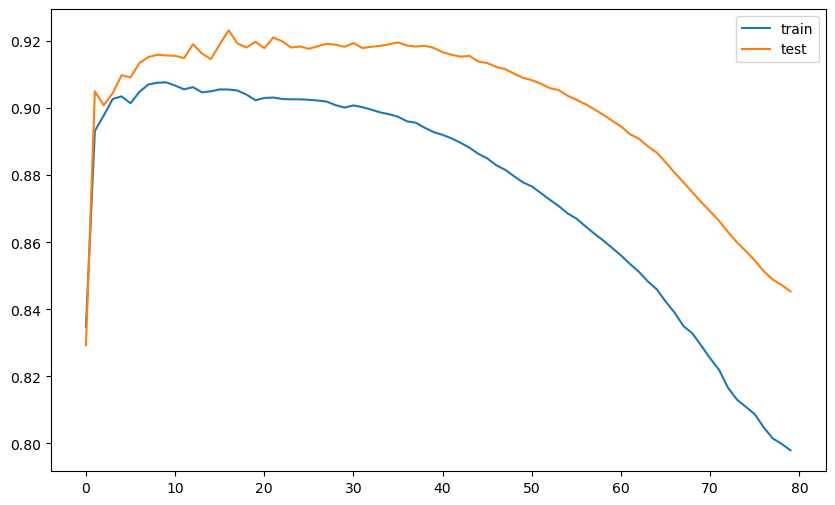

0.9232558084587841 17


In [809]:
plt.figure(figsize=(10, 6))
plt.plot(train_score, label='train')
plt.plot(test_score, label='test')
plt.legend()
plt.show()
print(max_score, test_score.index(max_score)+1)

In [810]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

train_score = []
test_score = []
max_score = -1
for k in kernels:
    SVR_model = SVR(kernel=k)
    SVR_model.fit(X_train, y_train)
    train_score.append(SVR_model.score(X_train, y_train))
    test_score.append(SVR_model.score(X_test, y_test))
    if test_score[-1] > max_score:
        max_score = test_score[-1]

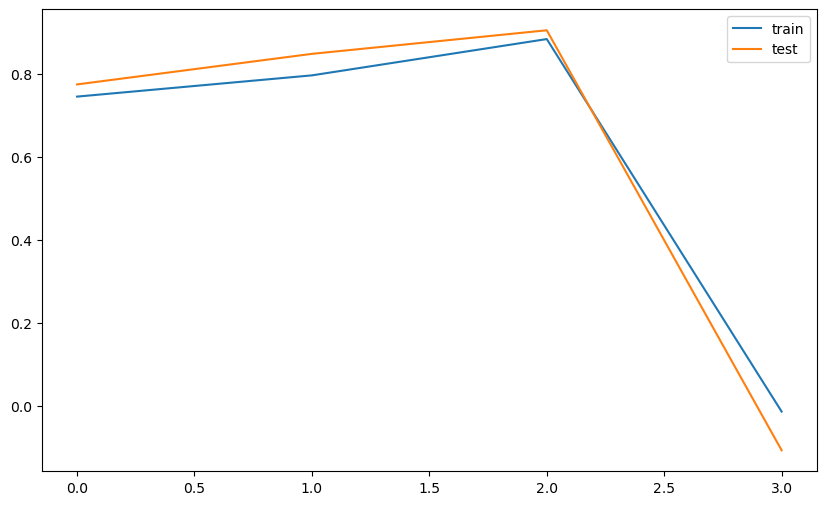

0.9056319314552381 rbf


In [811]:
plt.figure(figsize=(10, 6))
plt.plot(train_score, label='train')
plt.plot(test_score, label='test')
plt.legend()
plt.show()
print(max_score, kernels[test_score.index(max_score)])

In [812]:
C = [0.1, 1, 10, 100]

train_score = []
test_score = []
max_score = -1
for c in C:
    SVR_model = SVR(C=c)
    SVR_model.fit(X_train, y_train)
    train_score.append(SVR_model.score(X_train, y_train))
    test_score.append(SVR_model.score(X_test, y_test))
    if test_score[-1] > max_score:
        max_score = test_score[-1]

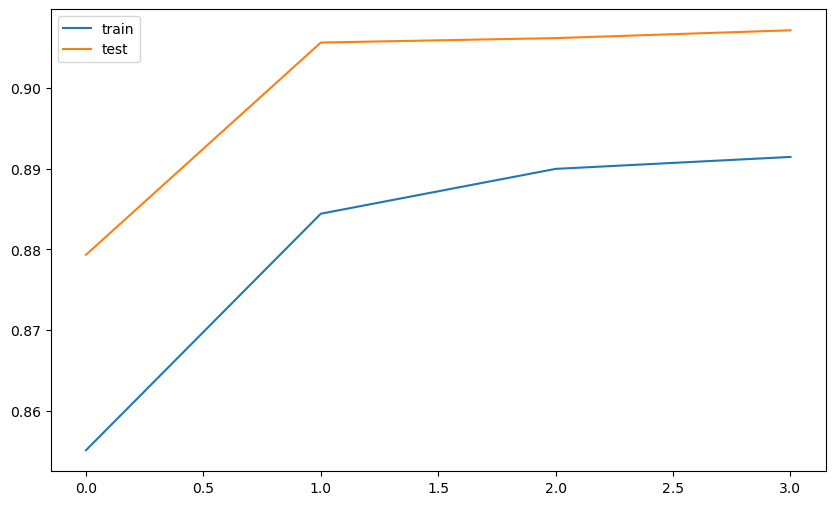

0.9071539961417983 100


In [813]:
plt.figure(figsize=(10, 6))
plt.plot(train_score, label='train')
plt.plot(test_score, label='test')
plt.legend()
plt.show()
print(max_score, C[test_score.index(max_score)])

In [814]:
epsilon = [0.001, 0.01, 0.05, 0.1, 1, 10, 20, 30]

train_score = []
test_score = []
max_score = -1
for e in epsilon:
    SVR_model = SVR(C=100, epsilon=e)
    SVR_model.fit(X_train, y_train)
    train_score.append(SVR_model.score(X_train, y_train))
    test_score.append(SVR_model.score(X_test, y_test))
    if test_score[-1] > max_score:
        max_score = test_score[-1]

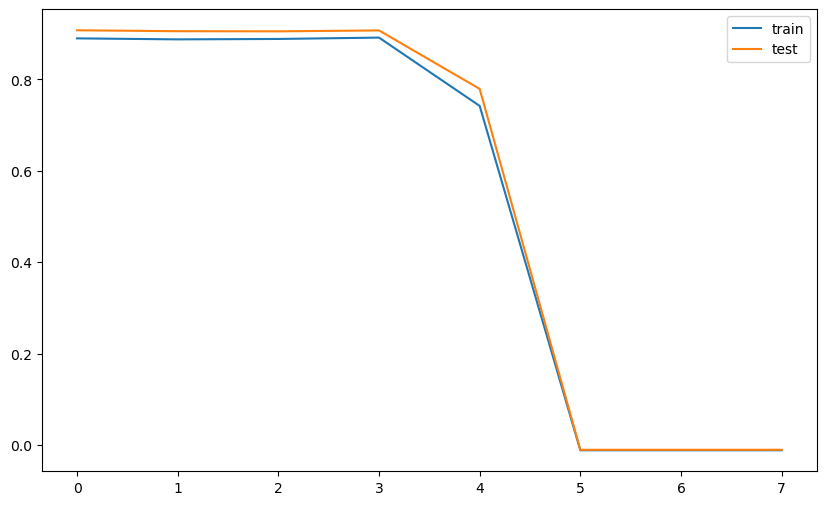

0.9074796025400158 0.001


In [815]:
plt.figure(figsize=(10, 6))
plt.plot(train_score, label='train')
plt.plot(test_score, label='test')
plt.legend()
plt.show()
print(max_score, epsilon[test_score.index(max_score)])

In [816]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [817]:
gb_model.score(X_train, y_train), gb_model.score(X_test, y_test)

(0.9194786496531344, 0.9298344962391516)

In [818]:
from sklearn.ensemble import VotingRegressor

vt_model = VotingRegressor(estimators=[('knn',KNeighborsRegressor(n_neighbors=17)),
                                       ('GB', GradientBoostingRegressor(random_state=42)),
                                       ('rf',RandomForestRegressor(random_state=42))])

vt_model.fit(X_train, y_train)

VotingRegressor(estimators=[('knn', KNeighborsRegressor(n_neighbors=17)),
                            ('GB', GradientBoostingRegressor(random_state=42)),
                            ('rf', RandomForestRegressor(random_state=42))])

In [819]:
vt_model.score(X_train, y_train), vt_model.score(X_test, y_test)

(0.9178760315745613, 0.9320785052669289)

In [820]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

st_model = StackingRegressor(estimators=[('knn1',KNeighborsRegressor(n_neighbors=17)),
                                       # ('GB', GradientBoostingRegressor(random_state=42)),
                                       ('rf2',RandomForestRegressor(random_state=42))],
                             final_estimator=LassoCV()
                             )

st_model.fit(X_train, y_train)

StackingRegressor(estimators=[('knn1', KNeighborsRegressor(n_neighbors=17)),
                              ('rf2', RandomForestRegressor(random_state=42))],
                  final_estimator=LassoCV())

In [821]:
st_model.score(X_train, y_train), st_model.score(X_test, y_test)

(0.9183505085697564, 0.9326904037008974)

In [822]:
st_model.predict(X_test)

array([3.0254228 , 7.88622155, 7.99817572, 3.0254228 , 7.99817572,
       7.00362513, 7.99817572, 4.4817342 , 3.0254228 , 4.799878  ,
       7.07495242, 6.00216045, 4.4817342 , 7.99817572, 4.4817342 ,
       7.88622155, 7.88622155, 7.07495242, 3.0254228 , 4.4817342 ,
       6.00907455, 4.96166448, 7.88622155, 4.6897998 , 4.6897998 ,
       4.23186786, 7.07495242, 7.00362513, 7.00362513, 3.04325462,
       6.00907455, 4.96166448, 6.00907455, 3.06108645, 7.99817572,
       4.4817342 , 7.5559648 , 6.00907455, 4.4817342 , 4.71557358,
       7.00362513, 7.88622155, 7.00362513, 7.00362513, 4.87410583,
       4.4817342 , 4.799878  , 6.00907455, 7.89118478, 6.00907455,
       3.06108645, 5.35114227, 7.99817572, 4.96166448, 5.92594331,
       3.06108645, 5.35114227, 7.89118478, 3.04325462, 7.99817572,
       4.799878  , 4.63095781, 7.99817572, 6.00907455, 4.63095781,
       7.88622155, 7.07495242, 3.0254228 , 4.99669214, 4.42366488,
       4.4817342 , 7.00362513, 3.0254228 , 7.88622155, 3.16345

In [823]:
models = []

models.append(LogisticRegression())
models.append(KNeighborsClassifier())
models.append(SVC())
models.append(RandomForestClassifier(random_state=42))
models.append(GradientBoostingClassifier(random_state=42))

In [824]:
X_train, X_test, y_train, y_test = train_test_split(feature, target,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=target)

In [825]:
for m in models:
    m.fit(X_train, y_train)
    print('model : ', m)
    print('train : ', m.score(X_train, y_train))
    print('test : ', m.score(X_test, y_test))
    print()

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model :  LogisticRegression()
train :  0.8060200668896321
test :  0.8133333333333334

model :  KNeighborsClassifier()
train :  0.862876254180602
test :  0.8666666666666667

model :  SVC()
train :  0.8327759197324415
test :  0.84

model :  RandomForestClassifier(random_state=42)
train :  0.8695652173913043
test :  0.8933333333333333
model :  GradientBoostingClassifier(random_state=42)
train :  0.8695652173913043
test :  0.8933333333333333


In [842]:
from sklearn.metrics import (mean_squared_error, mean_absolute_error, max_error, 
                             median_absolute_error, r2_score)
from sklearn.metrics import classification_report, confusion_matrix

In [833]:
for model in models:
    print('model : ', model)
    print(classification_report(y_test, model.predict(X_test)))
    print()

model :  LogisticRegression()
              precision    recall  f1-score   support

           3       1.00      0.93      0.96        14
           4       0.61      1.00      0.76        14
           5       0.78      0.50      0.61        14
           6       1.00      0.78      0.88         9
           7       1.00      0.60      0.75        10
           8       0.82      1.00      0.90        14

    accuracy                           0.81        75
   macro avg       0.87      0.80      0.81        75
weighted avg       0.85      0.81      0.81        75


model :  KNeighborsClassifier()
              precision    recall  f1-score   support

           3       1.00      0.93      0.96        14
           4       0.61      1.00      0.76        14
           5       0.88      0.50      0.64        14
           6       1.00      0.89      0.94         9
           7       1.00      0.90      0.95        10
           8       1.00      1.00      1.00        14

    accuracy  

In [839]:
mean_squared_error(y_test, st_model.predict(X_test))

0.17157126793766603

In [840]:
mean_absolute_error(y_test, st_model.predict(X_test))

0.22361600812837887

In [841]:
max_error(y_test, st_model.predict(X_test))

2.3690421864127487

In [843]:
median_absolute_error(y_test, st_model.predict(X_test))

0.07495242443432559

In [851]:
X_test.shape

(75, 2)

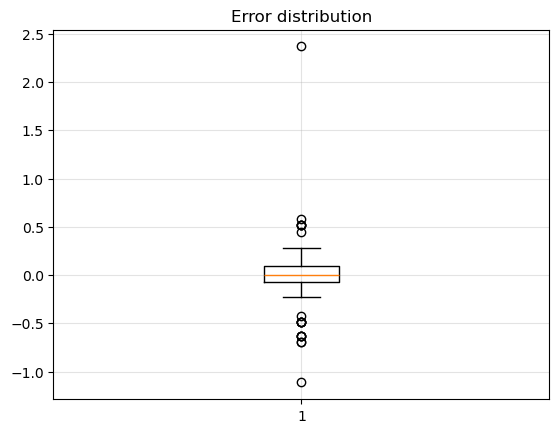

In [855]:
plt.boxplot(y_test - st_model.predict(X_test))
plt.title('Error distribution')
plt.grid(alpha=0.35)
plt.show()

In [826]:
import joblib
import os

In [827]:
model_name = 'stress_model.pkl'

joblib.dump(st_model, model_name)

['stress_model.pkl']

In [828]:
feature['Quality of Sleep'].unique()

array([6, 4, 7, 5, 8, 9], dtype=int64)

In [829]:
target.unique()

array([6, 8, 7, 4, 3, 5], dtype=int64)

In [830]:
my_sleep = [[6, 4]]

st_model.predict(my_sleep)

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.89118478])

In [856]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

st_model = StackingRegressor(estimators=[
    # ('knn1',KNeighborsRegressor(n_neighbors=17)),
                                       ('GB', GradientBoostingRegressor(random_state=42)),
                                       ('rf2',RandomForestRegressor(random_state=42))],
                             final_estimator=LassoCV()
                             )

st_model.fit(X_train, y_train)

StackingRegressor(estimators=[('GB',
                               GradientBoostingRegressor(random_state=42)),
                              ('rf2', RandomForestRegressor(random_state=42))],
                  final_estimator=LassoCV())

In [857]:
st_model.score(X_train, y_train), st_model.score(X_test, y_test)

(0.9178010920012218, 0.939410467450792)

In [859]:
mean_squared_error(y_test, st_model.predict(X_test))

0.18886699799427775

In [860]:
mean_absolute_error(y_test, st_model.predict(X_test))

0.25356509964875057

In [861]:
median_absolute_error(y_test, st_model.predict(X_test))

0.0509988268858117

In [862]:
max_error(y_test, st_model.predict(X_test))

2.2337390441338547

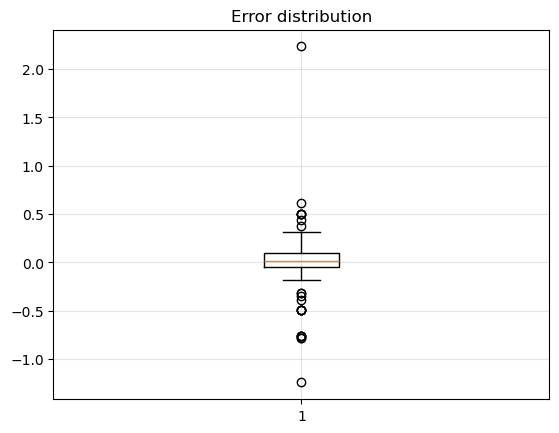

In [863]:
plt.boxplot(y_test - st_model.predict(X_test))
plt.title('Error distribution')
plt.grid(alpha=0.35)
plt.show()